## Project 1 - Team Malthus
### Introduction
For our project, our group is focusing on ...
### Import Libraries

In [26]:
%pip install cufflinks
%pip install wbdata
import wbdata
import pandas as pd
import datetime
import cufflinks as cf
cf.go_offline()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Load Data

In [27]:
wbdata.get_source()                                                           

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [28]:
#  40  Population estimates and projections

wbdata.get_indicator(source=40) 

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

In [29]:
#Population growth of country (annual %)
wbdata.get_data("SP.POP.GROW", country="NAM")

[{'indicator': {'id': 'SP.POP.GROW', 'value': 'Population growth (annual %)'},
  'country': {'id': 'NA', 'value': 'Namibia'},
  'countryiso3code': 'NAM',
  'date': '2022',
  'value': 1.44635918427576,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SP.POP.GROW', 'value': 'Population growth (annual %)'},
  'country': {'id': 'NA', 'value': 'Namibia'},
  'countryiso3code': 'NAM',
  'date': '2021',
  'value': 1.63585889002733,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SP.POP.GROW', 'value': 'Population growth (annual %)'},
  'country': {'id': 'NA', 'value': 'Namibia'},
  'countryiso3code': 'NAM',
  'date': '2020',
  'value': 1.72031062423917,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SP.POP.GROW', 'value': 'Population growth (annual %)'},
  'country': {'id': 'NA', 'value': 'Namibia'},
  'countryiso3code': 'NAM',
  'date': '2019',
  'value': 1.68846817343864,
  'unit': '',
  'obs_status': '',
  'decima

In [30]:
data_date = datetime.datetime(1980, 1, 1), datetime.datetime(2020, 1, 1)
wbdata.get_data("SP.POP.GROW", country="NAM")

[{'indicator': {'id': 'SP.POP.GROW', 'value': 'Population growth (annual %)'},
  'country': {'id': 'NA', 'value': 'Namibia'},
  'countryiso3code': 'NAM',
  'date': '2022',
  'value': 1.44635918427576,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SP.POP.GROW', 'value': 'Population growth (annual %)'},
  'country': {'id': 'NA', 'value': 'Namibia'},
  'countryiso3code': 'NAM',
  'date': '2021',
  'value': 1.63585889002733,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SP.POP.GROW', 'value': 'Population growth (annual %)'},
  'country': {'id': 'NA', 'value': 'Namibia'},
  'countryiso3code': 'NAM',
  'date': '2020',
  'value': 1.72031062423917,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SP.POP.GROW', 'value': 'Population growth (annual %)'},
  'country': {'id': 'NA', 'value': 'Namibia'},
  'countryiso3code': 'NAM',
  'date': '2019',
  'value': 1.68846817343864,
  'unit': '',
  'obs_status': '',
  'decima

In [31]:

def get_population_df (country):
    countries = [country]
    indicators = {"SP.POP.GROW": "population_growth"}
    return wbdata.get_dataframe(indicators, country=countries, convert_date=True)   


In [32]:
nambia_df = get_population_df("NAM")

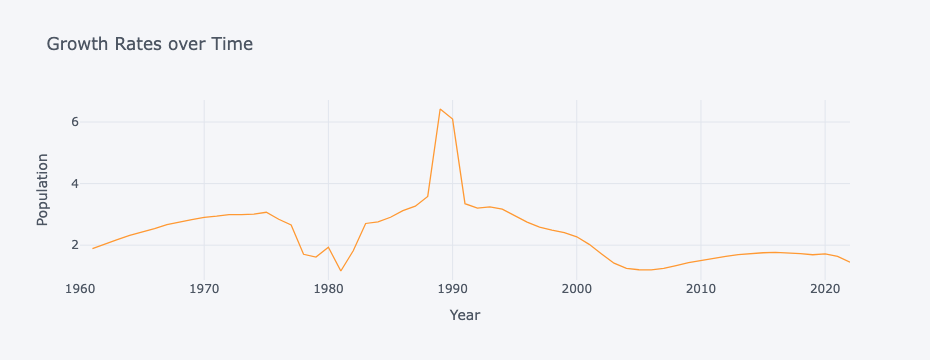

In [33]:
nambia_df.iplot(title="Growth Rates over Time",xTitle='Year',yTitle='Population')

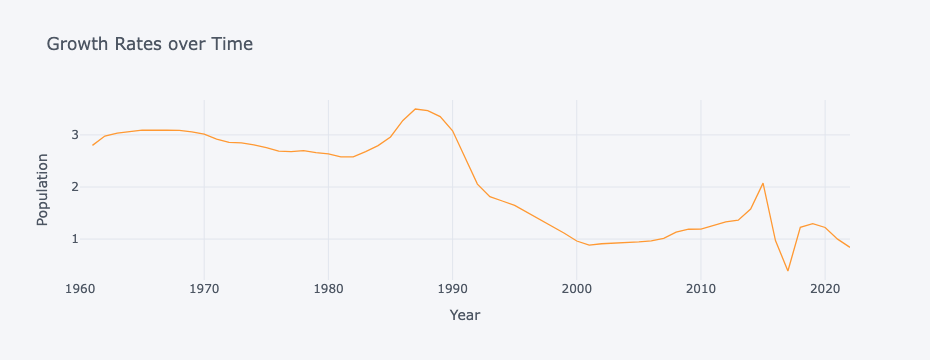

In [34]:
south_africa_df = get_population_df("ZAF")
south_africa_df.iplot(title="Growth Rates over Time",xTitle='Year',yTitle='Population')

In [35]:
# Data from WDI on age-sex comes in the forms of variables
# which take the form "SP.POP.LLHH.MA" for males
# and "SP.POP.LLHH.FE" for females, where LL is the *low* end of
# age range, like "05" for 5-yo, and HH is the *high* end.

# We construct a list of age-ranges.

# Start with an empty list of age-rages
age_ranges = []

# Ranges top out at 80, and go in five year increments
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

print(age_ranges)

['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [36]:
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

print(variables)

{'SP.POP.0004.MA': 'Males 0004', 'SP.POP.0509.MA': 'Males 0509', 'SP.POP.1014.MA': 'Males 1014', 'SP.POP.1519.MA': 'Males 1519', 'SP.POP.2024.MA': 'Males 2024', 'SP.POP.2529.MA': 'Males 2529', 'SP.POP.3034.MA': 'Males 3034', 'SP.POP.3539.MA': 'Males 3539', 'SP.POP.4044.MA': 'Males 4044', 'SP.POP.4549.MA': 'Males 4549', 'SP.POP.5054.MA': 'Males 5054', 'SP.POP.5559.MA': 'Males 5559', 'SP.POP.6064.MA': 'Males 6064', 'SP.POP.6569.MA': 'Males 6569', 'SP.POP.7074.MA': 'Males 7074', 'SP.POP.7579.MA': 'Males 7579', 'SP.POP.80UP.MA': 'Males 80UP', 'SP.POP.0004.FE': 'Females 0004', 'SP.POP.0509.FE': 'Females 0509', 'SP.POP.1014.FE': 'Females 1014', 'SP.POP.1519.FE': 'Females 1519', 'SP.POP.2024.FE': 'Females 2024', 'SP.POP.2529.FE': 'Females 2529', 'SP.POP.3034.FE': 'Females 3034', 'SP.POP.3539.FE': 'Females 3539', 'SP.POP.4044.FE': 'Females 4044', 'SP.POP.4549.FE': 'Females 4549', 'SP.POP.5054.FE': 'Females 5054', 'SP.POP.5559.FE': 'Females 5559', 'SP.POP.6064.FE': 'Females 6064', 'SP.POP.6569.

In [59]:
df2 = wbdata.get_dataframe(variables,country="NAM")
print(df.query("date=='2020'").sum(axis=0))

Males 0004      165958.0
Males 0509      152328.0
Males 1014      130102.0
Males 1519      116947.0
Males 2024      115136.0
Males 2529      114346.0
Males 3034       91394.0
Males 3539       70369.0
Males 4044       61243.0
Males 4549       51347.0
Males 5054       41557.0
Males 5559       31112.0
Males 6064       22407.0
Males 6569       16089.0
Males 7074       10666.0
Males 7579        6193.0
Males 80UP        4463.0
Females 0004    165650.0
Females 0509    154033.0
Females 1014    133073.0
Females 1519    120093.0
Females 2024    118321.0
Females 2529    119223.0
Females 3034     96734.0
Females 3539     75214.0
Females 4044     65671.0
Females 4549     56876.0
Females 5054     49208.0
Females 5559     39533.0
Females 6064     30845.0
Females 6569     24203.0
Females 7074     16950.0
Females 7579     10733.0
Females 80UP     11080.0
dtype: float64


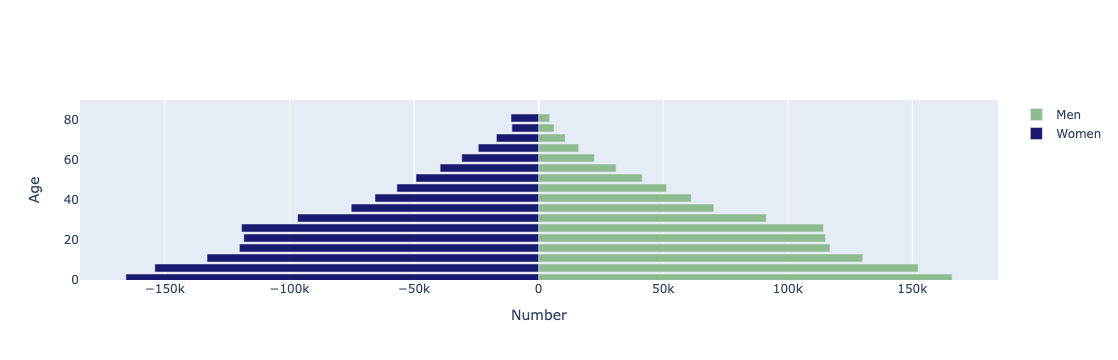

In [60]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = range (2020,1960,-20)

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='darkseagreen'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color = 'midnightblue'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

In [50]:
df = wbdata.get_dataframe(variables,country="ZAF")
print(df.query("date=='2020'").sum(axis=0))

Males 0004      2943869.0
Males 0509      2901931.0
Males 1014      2753974.0
Males 1519      2331167.0
Males 2024      2424376.0
Males 2529      2761160.0
Males 3034      2870783.0
Males 3539      2380385.0
Males 4044      1654462.0
Males 4549      1394163.0
Males 5054      1399527.0
Males 5559       971913.0
Males 6064       589805.0
Males 6569       477104.0
Males 7074       344200.0
Males 7579       203018.0
Males 80UP       178949.0
Females 0004    2840382.0
Females 0509    2798835.0
Females 1014    2660490.0
Females 1519    2252086.0
Females 2024    2366586.0
Females 2529    2709949.0
Females 3034    2819281.0
Females 3539    2337648.0
Females 4044    1619533.0
Females 4549    1501805.0
Females 5054    1698176.0
Females 5559    1321598.0
Females 6064     969617.0
Females 6569     828009.0
Females 7074     642663.0
Females 7579     408430.0
Females 80UP     446059.0
dtype: float64


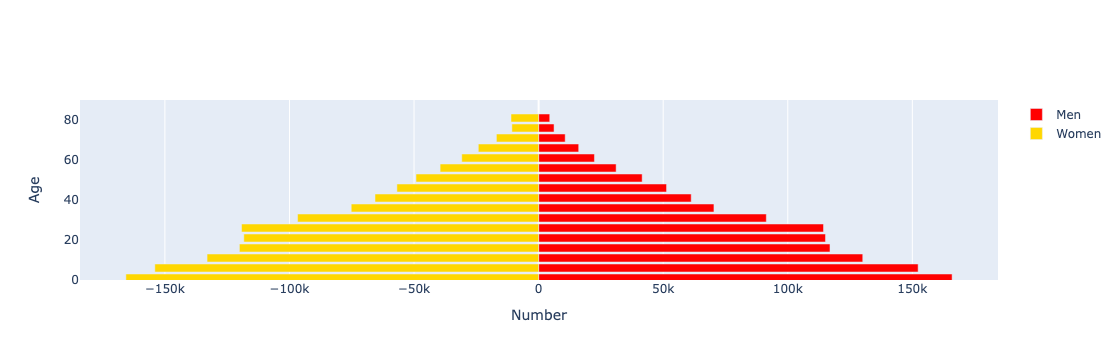

In [57]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = range (2020,1960,-20)

bins = [go.Bar(x = df2.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='red'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df2.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color = 'gold'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

fig_population_growth = go.Figure(data=[trace_population_growth], layout=layout_population_growth)

Males 0004      166945.0
Males 0509      157787.0
Males 1014      138796.0
Males 1519      118803.0
Males 2024      115272.0
Males 2529      111956.0
Males 3034      101306.0
Males 3539       74973.0
Males 4044       62423.0
Males 4549       53384.0
Males 5054       43254.0
Males 5559       33145.0
Males 6064       23387.0
Males 6569       16275.0
Males 7074       10542.0
Males 7579        6202.0
Males 80UP        4109.0
Females 0004    166301.0
Females 0509    158902.0
Females 1014    141572.0
Females 1519    122027.0
Females 2024    118436.0
Females 2529    116519.0
Females 3034    107251.0
Females 3539     80598.0
Females 4044     67550.0
Females 4549     59043.0
Females 5054     50966.0
Females 5559     42162.0
Females 6064     32366.0
Females 6569     24924.0
Females 7074     17780.0
Females 7579     11255.0
Females 80UP     10796.0
dtype: float64


Males 0004      2960601.0
Males 0509      2895592.0
Males 1014      2845429.0
Males 1519      2480235.0
Males 2024      2302529.0
Males 2529      2625610.0
Males 3034      2852731.0
Males 3539      2571531.0
Males 4044      1948757.0
Males 4549      1336718.0
Males 5054      1406762.0
Males 5559      1103300.0
Males 6064       654564.0
Males 6569       457014.0
Males 7074       347139.0
Males 7579       205322.0
Males 80UP       174174.0
Females 0004    2858086.0
Females 0509    2793739.0
Females 1014    2746735.0
Females 1519    2395597.0
Females 2024    2236869.0
Females 2529    2584541.0
Females 3034    2807895.0
Females 3539    2543744.0
Females 4044    1903173.0
Females 4549    1379489.0
Females 5054    1654468.0
Females 5559    1445928.0
Females 6064    1029722.0
Females 6569     811753.0
Females 7074     658127.0
Females 7579     428376.0
Females 80UP     447634.0
dtype: float64


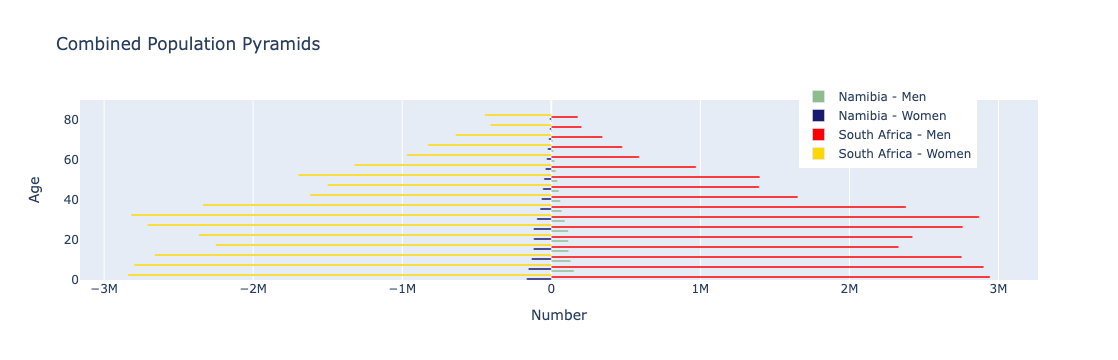

In [65]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

df = wbdata.get_dataframe (variables, country="NAM")
print (df.query("date=='2022'") .sum(axis=0))
py.init_notebook_mode(connected=True)

# Namibia Population Pyramid
layout_namibia = go.Layout(barmode='overlay',
                           yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                           xaxis=go.layout.XAxis(title='Number'),
                           title='Namibia Population Pyramid')

year_namibia = range (2020,1960,-20)

bins_NAM = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
                       y=[int(s[:2]) + 1 for s in age_ranges],
                       orientation='h',
                       name='Namibia - Men',
                       marker=dict(color='darkseagreen'),
                       hoverinfo='skip'),

                go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                       y=[int(s[:2]) + 1 for s in age_ranges],
                       orientation='h',
                       name='Namibia - Women',
                       marker=dict(color='midnightblue'),
                       hoverinfo='skip',
                       )
                ]
df2 = wbdata.get_dataframe (variables, country="ZAF")
print (df2.query("date=='2022'") .sum(axis=0))

# South Africa Population Pyramid
layout_south_africa = go.Layout(barmode='overlay',
                                yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                                xaxis=go.layout.XAxis(title='Number'),
                                title='South Africa Population Pyramid')

year_south_africa = range (2020,1960,-20)

bins_SSF = [go.Bar(x = df2.loc[str(year),:].filter(regex="Male").values,
                            y=[int(s[:2]) + 1 for s in age_ranges],
                            orientation='h',
                            name='South Africa - Men',
                            marker=dict(color='red'),
                            hoverinfo='skip'),

                     go.Bar(x = -df2.loc[str(year),:].filter(regex="Female").values,
                            y=[int(s[:2]) + 1 for s in age_ranges],
                            orientation='h',
                            name='South Africa - Women',
                            marker=dict(color='gold'),
                            hoverinfo='skip',
                            )
                     ]

# Combine Namibia and South Africa Population Pyramids
fig = go.Figure(data=bins_NAM + bins_SSF, layout=go.Layout(barmode='group',
                                                                        yaxis=go.layout.YAxis(
                                                                            range=[0, 90], title='Age'),
                                                                        xaxis=go.layout.XAxis(title='Number'),
                                                                        title='Combined Population Pyramids'))

# Add a legend
fig.update_layout(legend=dict(x=0.75, y=1.1))

# Show the plot
py.iplot(fig)